# Análisis comparativo de robustez entre Momentos de Hu y Zernike

## Preprocesamiento y Aumento de Datos:

### Importar librerías necesarias

In [16]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random

### Cargar imágenes de muestra desde las carpetas de datos

In [5]:
# Configuración de rutas
DATASET_PATH = "../data/all-images/" 
CLASSES = ["circle", "triangle", "square"]

In [13]:
def load_sample_images(base_path, categories):
    samples = []
    
    for category in categories:
        path = os.path.join(base_path, category)
        if not os.path.exists(path):
            print(f"ruta no válida: {path}")
            continue
            
        # listar los archivos y tomar el primero
        files = os.listdir(path)
        for file in files:
            if file.endswith(('.PNG', '.JPG', '.JPEG')):
                img_path = os.path.join(path, file)
                # escala de grises (modo 0)
                img = cv2.imread(img_path, 0) 
                samples.append((category, img))
                break
    return samples

In [11]:
# Cargar muestras
sample_images = load_sample_images(DATASET_PATH, CLASSES)

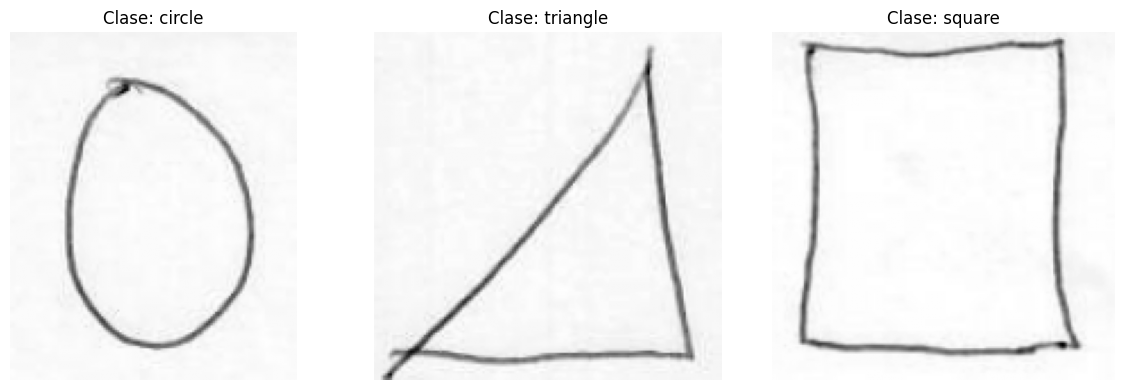

In [14]:
# Visualizar
plt.figure(figsize=(12, 4))
for i, (name, img) in enumerate(sample_images):
    plt.subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Clase: {name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Funsión de ruido

- Agregar ruido gaussiano

In [17]:
def add_gaussian_noise(image, level='bajo'):
    """
    Agrega ruido Gaussiano a una imagen.
    Niveles controlan la desviación estándar (sigma).
    """

    row, col = image.shape
    mean = 0
    
    levels = {
        'bajo': 10,   
        'medio': 40,   
        'alto': 80     
    }
    
    sigma = levels.get(level, 10)
    
    # Generar ruido gaussiano
    gauss = np.random.normal(mean, sigma, (row, col))
    
    # Sumar ruido a la imagen
    noisy_image = image.astype(np.float32) + gauss
    
    # Normalizar para mantener valores entre 0 y 255 y convertir a uint8
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

- Agregar ruido gaussiano

In [18]:
def add_salt_pepper_noise(image, level='bajo'):
    """
    Agrega ruido tipo Sal y Pimienta.
    Niveles controlan la probabilidad de afectación.
    """
    row, col = image.shape
    noisy_image = np.copy(image)
    
    # Definir probabilidad (cantidad de ruido)
    levels = {
        'bajo': 0.02,   # 2% de los píxeles afectados
        'medio': 0.10,  # ...
        'alto': 0.25    
    }
    
    prob = levels.get(level, 0.02)
    
    # pixeles blancos
    # generar máscara aleatoria
    num_salt = np.ceil(prob * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[tuple(coords)] = 255

    # pixeles negros
    num_pepper = np.ceil(prob * image.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[tuple(coords)] = 0
    
    return noisy_image

- Prueba de funciones de ruido

In [ ]:
if len(sample_images) > 0:
    # usar primera imagen cargada
    test_img_name, test_img = sample_images[0] 
    
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    
    # Fila 1: Ruido Gaussiano
    axes[0,0].imshow(test_img, cmap='gray')
    axes[0,0].set_title("Original")
    axes[0,0].axis('off')
    
    axes[0,1].imshow(add_gaussian_noise(test_img, 'bajo'), cmap='gray')
    axes[0,1].set_title("Gaussiano - Bajo")
    axes[0,1].axis('off')
    
    axes[0,2].imshow(add_gaussian_noise(test_img, 'medio'), cmap='gray')
    axes[0,2].set_title("Gaussiano - Medio")
    axes[0,2].axis('off')
    
    axes[0,3].imshow(add_gaussian_noise(test_img, 'alto'), cmap='gray')
    axes[0,3].set_title("Gaussiano - Alto")
    axes[0,3].axis('off')

    # Fila 2: Ruido Sal y Pimienta
    axes[1,0].imshow(test_img, cmap='gray')
    axes[1,0].set_title("Original")
    axes[1,0].axis('off')
    
    axes[1,1].imshow(add_salt_pepper_noise(test_img, 'bajo'), cmap='gray')
    axes[1,1].set_title("S&P - Bajo")
    axes[1,1].axis('off')
    
    axes[1,2].imshow(add_salt_pepper_noise(test_img, 'medio'), cmap='gray')
    axes[1,2].set_title("S&P - Medio")
    axes[1,2].axis('off')
    
    axes[1,3].imshow(add_salt_pepper_noise(test_img, 'alto'), cmap='gray')
    axes[1,3].set_title("S&P - Alto")
    axes[1,3].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron imágenes en sample_images. Revisa el paso anterior.")